<a href="https://colab.research.google.com/github/lmkwytnicholas/nic.github.io/blob/master/autoMpgKmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of Instances: 398

Number of Attributes: 9 including the class attribute

Attribute Information:

* mpg: continuous
* cylinders: multi-valued discrete
* displacement: continuous
* horsepower: continuous
* weight: continuous
* acceleration: continuous
* model year: multi-valued discrete
* origin: multi-valued discrete
* car name: string (unique for each instance)

Missing Attribute Values: horsepower has 6 missing values


#Data Access & EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tech I.S./Datasets/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.shape

(398, 9)

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
col_name = df.columns
for i in col_name:
  print(i,'has: ',df[i].nunique(),'unique values')

mpg has:  129 unique values
cylinders has:  5 unique values
displacement has:  82 unique values
horsepower has:  94 unique values
weight has:  351 unique values
acceleration has:  95 unique values
model year has:  13 unique values
origin has:  3 unique values
car name has:  305 unique values


***Investigating why the `horsepower` metric is an `object` datatype rather than the necessary `numeric` datatype and taking the steps to replace***

In [ ]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
# 'horsepower' feature dtype came out as 'object'
# Printing .unique() values showed '?' in the output
# Omit '?' and replace with median value
x=df[(df['horsepower']!='?')]
x=x.horsepower.median()
x

93.5

In [ ]:
df.horsepower.replace(to_replace='?',value=93.5,inplace=True)
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', 93.5, '100', '105', '175', '153', '180',
       '110', '72', '86', '70', '76', '65', '69', '60', '80', '54', '208',
       '155', '112', '92', '145', '137', '158', '167', '94', '107', '230',
       '49', '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
df.horsepower = df.horsepower.astype('float')

In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


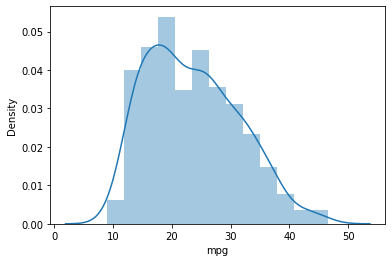

In [ ]:
sns.distplot(df['mpg'])
plt.show()

In [ ]:
print('Skewness: {}'.format(round(df['mpg'].skew(),5)))
print('Kurtosis: {}'.format(round(df['mpg'].kurt(),5)))

Skewness: 0.45707
Kurtosis: -0.51078


#K-Means Implementation

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans=KMeans(n_clusters=3)

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [ ]:
# Drop `mpg` feature as that is to be clustered for
kmeans.fit(df.drop(['cylinders','displacement','weight','acceleration','model year','origin','car name'],axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print(kmeans.cluster_centers_)

[[ 22.26494253  99.74137931]
 [ 14.48222222 164.44444444]
 [ 31.20373134  69.8358209 ]]


In [ ]:
y=kmeans.labels_
print(y)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 2 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 0 2 0 0 0 0 2 2 2 2 2 2 0 2 2 0 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 0 2 0 2 0 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 2 1 1 1 1 0 0 2 0
 0 0 0 0 1 1 2 2 0 0 1 0 0 1 0 0 0 0 2 2 2 2 0 0 0 1 1 1 1 1 2 2 2 2 2 2 2
 2 0 0 2 0 0 2 2 1 1 1 1 0 0 0 0 0 0 0 2 2 0 2 0 2 0 0 2 0 0 0 0 0 2 0 2 0
 2 2 1 1 0 1 0 0 2 0 2 2 2 2 0 2 0 0 2 2 2 2 0 1 0 0 0 1 1 0 1 2 2 2 0 2 1
 0 1 0 0 0 0 0 1 1 1 1 2 0 2 0 2 2 2 2 0 0 0 2 2 2 2 2 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 2 0 0 2 0 0 0 0 0 0 0 1 2 2 0 0 0 0 0 0 0 1 1 1 1 0 1 2 2 2
 2 2 0 2 0 2 2 2 2 0 0 0 0 2 2 2 2 0 0 0 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 2 2
 0 0 0 0 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 0 0 0 0 0 0 0 0
 2 2 0 0 0 2 2 2 2 2 0 2 2 2 2 2 0 2 0 0 0 2 0 0 2 2 2 2]


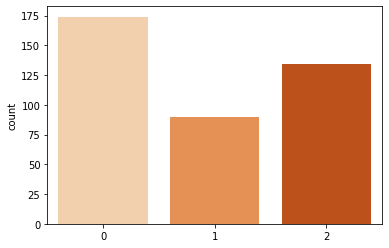

In [ ]:
sns.countplot(x=kmeans.labels_,palette='Oranges')
plt.show()

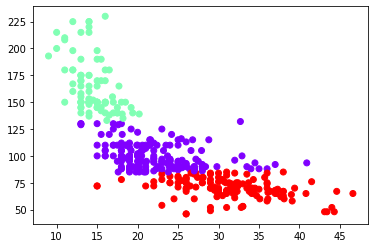

In [ ]:
# Scatterplot of K = 3
plt.scatter(df.iloc[:,0].values,df.iloc[:,3].values, c=kmeans.labels_,cmap='rainbow')
plt.show()

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


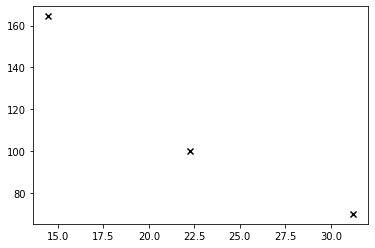

In [ ]:
# Centroids
centers=np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0],centers[:,1],marker='x',color='k')

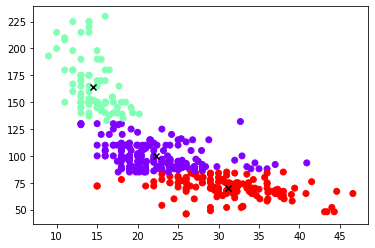

In [ ]:
plt.scatter(df.iloc[:,0].values,df.iloc[:,3].values, c=kmeans.labels_,cmap='rainbow')
centers=np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0],centers[:,1],marker='x',color='k')
plt.show()

#`K` Determination with Elbow Method


In [ ]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [ ]:
K=range(1,10)
# Drop everything but the `mpg` feature
X=df.drop(['cylinders','displacement','weight','acceleration','model year','origin','car name'],axis=1)
KM=[KMeans(n_clusters=k).fit(X) for k in K]
centroids=[k.cluster_centers_ for k in KM]
D_k=[cdist(X,cent,'euclidean') for cent in centroids]
cIdx=[np.argmin(D,axis=1) for D in D_k]
dist=[np.min(D,axis=1) for D in D_k]
avgwithinSS=[sum(d)/X.shape[0] for d in dist]

In [ ]:
# Calculate WCSS
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss - wcss
varExplained = bss/tss*100

In [ ]:
kIdx = 10 - 1

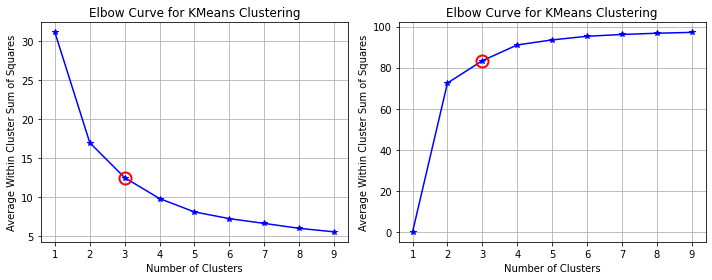

In [ ]:
kIdx = 2
# Elbow Curve
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K,avgwithinSS,'b*-')
plt.plot(K[kIdx],avgwithinSS[kIdx],marker='o',markersize=12,
         markeredgewidth=2,markeredgecolor='r',markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Average Within Cluster Sum of Squares')
plt.title('Elbow Curve for KMeans Clustering')
plt.subplot(1,2,2)
plt.plot(K,varExplained,'b*-')
plt.plot(K[kIdx],varExplained[kIdx],marker='o',markersize=12,
         markeredgewidth=2,markeredgecolor='r',markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Average Within Cluster Sum of Squares')
plt.title('Elbow Curve for KMeans Clustering')
plt.tight_layout()

***Compute `Average silhouette Score`***

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [ ]:
print(X)

      mpg  horsepower
0    18.0       130.0
1    15.0       165.0
2    18.0       150.0
3    16.0       150.0
4    17.0       140.0
..    ...         ...
393  27.0        86.0
394  44.0        52.0
395  32.0        84.0
396  28.0        79.0
397  31.0        82.0

[398 rows x 2 columns]


In [ ]:
silhouette_score(X,y)

0.525863077001247

In [ ]:
score = []
for n_clusters in range(2,10):
  kmeans=KMeans(n_clusters=n_clusters)
  kmeans.fit(X)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  score.append(silhouette_score(X,labels,metric='euclidean'))


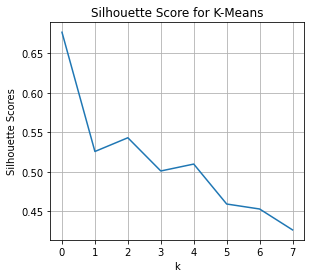

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(score)
plt.grid(True)
plt.ylabel('Silhouette Scores')
plt.xlabel('k')
plt.title('Silhouette Score for K-Means')
plt.show()